In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import warnings
import pandas as pd
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)


In [ ]:
!pip install tensorflow

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UU/BNB-USD (BaoCao).csv')


df = df.groupby('Date').sum()

In [ ]:
!pip install keras

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-01,10.356931,11.607489,10.325634,11.393217,11.393217,117838677
2019-03-02,11.384693,11.915753,10.960816,11.869744,11.869744,120807894
2019-03-03,11.845305,11.964979,11.352064,11.537903,11.537903,89868246
2019-03-04,11.538013,11.599405,11.070543,11.545945,11.545945,89421231
2019-03-05,11.520388,13.841443,11.520388,13.811967,13.811967,237026335
...,...,...,...,...,...,...
2024-05-28,603.526428,604.985107,593.716187,601.213257,601.213257,1852329404
2024-05-29,601.213257,602.931519,592.966614,594.972046,594.972046,1642696946
2024-05-30,594.972534,601.665039,586.557678,595.026794,595.026794,1737524745


In [ ]:
import numpy as np
data = df[['Close']]
# Convert the dataframe to a numpy array
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .9 ))
dataset

array([[ 11.393217],
       [ 11.869744],
       [ 11.537903],
       ...,
       [595.026794],
       [593.522339],
       [601.304199]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00301242],
       [0.0037276 ],
       [0.00322957],
       ...,
       [0.87894713],
       [0.8766892 ],
       [0.88836845]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# we use 60 days ahead for forecasting range
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


[array([0.00301242, 0.0037276 , 0.00322957, 0.00324163, 0.00664255,
       0.0077021 , 0.00864453, 0.00747546, 0.00777404, 0.00766682,
       0.0076968 , 0.00903512, 0.00859837, 0.00850228, 0.0085413 ,
       0.01010503, 0.00956793, 0.00944917, 0.00946655, 0.00884585,
       0.00770127, 0.00882544, 0.00877977, 0.01185552, 0.01118862,
       0.01043019, 0.01109908, 0.01113508, 0.01069205, 0.01132551,
       0.01203008, 0.01285379, 0.01561423, 0.01405829, 0.01464306,
       0.01510948, 0.01460244, 0.0145944 , 0.01309872, 0.01358101,
       0.01330115, 0.01247855, 0.01357984, 0.01400837, 0.01516734,
       0.01503288, 0.01567077, 0.01533443, 0.01898914, 0.02264637,
       0.02344518, 0.02222396, 0.02179514, 0.02024651, 0.02062593,
       0.01929626, 0.02023626, 0.01944406, 0.02028115, 0.01848875])]
[0.01912325324112618]

[array([0.00301242, 0.0037276 , 0.00322957, 0.00324163, 0.00664255,
       0.0077021 , 0.00864453, 0.00747546, 0.00777404, 0.00766682,
       0.0076968 , 0.00903512, 0.00

<Axes: xlabel='Date'>

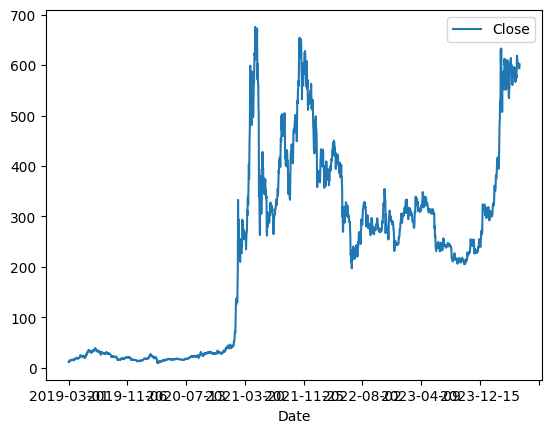

In [ ]:
data.plot()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1668/1668 [==============================] - 142s 79ms/step - loss: 0.0027


In [ ]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Dự đoán dữ liệu kiểm tra
predictions = model.predict(x_test)

# Chuẩn bị dữ liệu đầu vào cho dự đoán 30, 60, và 90 ngày
x_input = test_data[-60:].reshape(1, -1)
temp_input = list(x_input[0])

# Dự đoán 30, 60, và 90 ngày tiếp theo
lst_output = []
n_steps = 60
i = 0
while i < 90:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

6/6 [==============================] - 3s 92ms/step


In [ ]:
# Chuẩn bị dữ liệu cho biểu đồ
train_data = scaled_data[:training_data_len]
valid_data = scaled_data[training_data_len:]
train_data_index = pd.RangeIndex(start=0, stop=len(train_data), step=1)
test_data_index = pd.RangeIndex(start=len(train_data), stop=len(train_data) + len(valid_data), step=1)


In [ ]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(scaled_data)  # Giả sử scaled_data đã được chuẩn bị trước
train_data_inv = scaler.inverse_transform(train_data)
valid_data_inv = scaler.inverse_transform(valid_data)
predictions_inv = scaler.inverse_transform(predictions)
lst_output_inv = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))


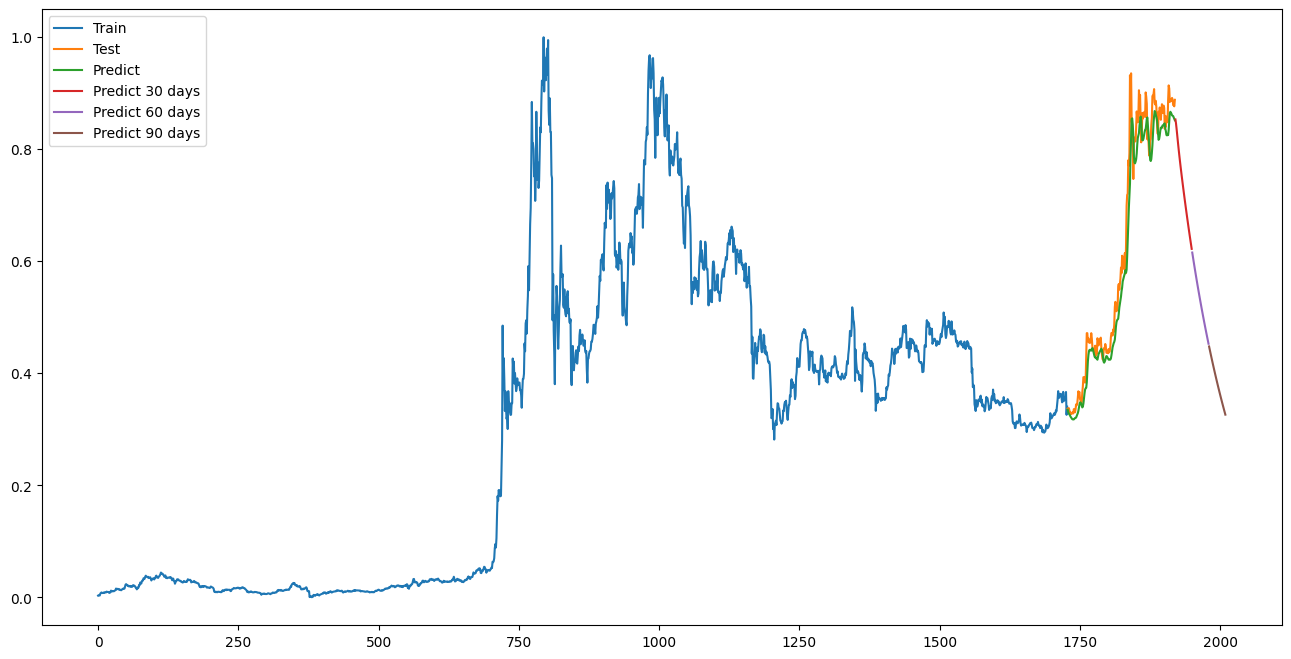

In [ ]:

# Vẽ biểu đồ
plt.figure(figsize=(16,8))
plt.plot(train_data_index, train_data_inv, label='Train')
plt.plot(test_data_index, valid_data_inv, label='Test')
plt.plot(test_data_index, predictions_inv, label='Predict')

# Chỉ số dữ liệu dự đoán 30 ngày đầu tiên
predict_data_index_30 = pd.RangeIndex(start=len(scaled_data), stop=len(scaled_data) + 30, step=1)
plt.plot(predict_data_index_30, lst_output_inv[:30], label='Predict 30 days')

# Chỉ số dữ liệu dự đoán 60 ngày tiếp theo
predict_data_index_60 = pd.RangeIndex(start=len(scaled_data) + 30, stop=len(scaled_data) + 60, step=1)
plt.plot(predict_data_index_60, lst_output_inv[30:60], label='Predict 60 days')

# Chỉ số dữ liệu dự đoán 90 ngày cuối cùng
predict_data_index_90 = pd.RangeIndex(start=len(scaled_data) + 60, stop=len(scaled_data) + 90, step=1)
plt.plot(predict_data_index_90, lst_output_inv[60:90], label='Predict 90 days')

# Hiển thị đồ thị
plt.legend()
plt.show()

In [124]:
# Dự đoán giá trị
predictions = model.predict(x_test)

# Chuẩn bị y_test (giá trị thực tế)
y_test = dataset[training_data_len:, :]

# Inverse transform predictions and y_test to get actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)



6/6 [==============================] - 0s 74ms/step


In [125]:
# Tính toán MSE
mse = mean_squared_error(y_test, predictions)

# Tính toán RMSE
rmse = np.sqrt(mse)

# Tính toán MAPE
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Squared Error (MSE): 203627.5780599742
Root Mean Squared Error (RMSE): 451.25112527280663
Mean Absolute Percentage Error (MAPE): 0.9986028512799727
